# Imports

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from tp_models import pnp_pgd_denoising, red_denoising, crr_nn_denoising, psnr

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

In [6]:
!wget https://perso.telecom-paristech.fr/aleclaire/mva/tp9.zip
!unzip tp9.zip
!rm -r im
!rm tp9.zip

--2025-03-21 17:37:10--  https://perso.telecom-paristech.fr/aleclaire/mva/tp9.zip
Résolution de perso.telecom-paristech.fr (perso.telecom-paristech.fr)… 2a04:8ec0:0:a::89c2:16e3, 137.194.22.227
Connexion à perso.telecom-paristech.fr (perso.telecom-paristech.fr)|2a04:8ec0:0:a::89c2:16e3|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 501814458 (479M) [application/zip]
Sauvegarde en : « tp9.zip »

tp9.zip             100%[===================>] 478,57M  38,3MB/s    ds 13s     

2025-03-21 17:37:23 (37,5 MB/s) — « tp9.zip » sauvegardé [501814458/501814458]

Archive:  tp9.zip
   creating: ckpts/
  inflating: ckpts/drunet_color.pth  
  inflating: ckpts/dncnn_sigma2_color.pth  
  inflating: ckpts/Prox-DRUNet.ckpt  
  inflating: ckpts/GSDRUNet.ckpt     
  inflating: ckpts/dncnn_sigma2_lipschitz_color.pth  
   creating: im/
  inflating: im/simpson512.png       
  inflating: im/simpson512g.png      
  inflating: im/simpson512gcrop.png  
  inflating: im/simpson51

# Experiments

## PNP-PGD

In [21]:
x, psnr, tab = pnp_pgd_denoising("images/photographer.png", niter=10)
plt.imshow(x)

tensor([[[0.6118, 0.6118, 0.6118],
         [0.6235, 0.6235, 0.6235],
         [0.6196, 0.6196, 0.6196],
         ...,
         [0.5922, 0.5922, 0.5922],
         [0.5961, 0.5961, 0.5961],
         [0.5961, 0.5961, 0.5961]],

        [[0.6275, 0.6275, 0.6275],
         [0.6039, 0.6039, 0.6039],
         [0.6157, 0.6157, 0.6157],
         ...,
         [0.6039, 0.6039, 0.6039],
         [0.6078, 0.6078, 0.6078],
         [0.6000, 0.6000, 0.6000]],

        [[0.6118, 0.6118, 0.6118],
         [0.6235, 0.6235, 0.6235],
         [0.6196, 0.6196, 0.6196],
         ...,
         [0.5922, 0.5922, 0.5922],
         [0.5961, 0.5961, 0.5961],
         [0.5961, 0.5961, 0.5961]],

        ...,

        [[0.4471, 0.4471, 0.4471],
         [0.5176, 0.5176, 0.5176],
         [0.4824, 0.4824, 0.4824],
         ...,
         [0.5294, 0.5294, 0.5294],
         [0.5373, 0.5373, 0.5373],
         [0.4471, 0.4471, 0.4471]],

        [[0.4745, 0.4745, 0.4745],
         [0.4941, 0.4941, 0.4941],
         [0.

KeyboardInterrupt: 

## RED-PGD

[   0/ 100] [0.00000 s] PSNR = 18.39
[  10/ 100] [0.29287 s] PSNR = 20.79
[  20/ 100] [0.57122 s] PSNR = 22.17
[  30/ 100] [0.84902 s] PSNR = 23.13
[  40/ 100] [1.12706 s] PSNR = 23.84
[  50/ 100] [1.40636 s] PSNR = 24.39
[  60/ 100] [1.68466 s] PSNR = 24.83
[  70/ 100] [1.96297 s] PSNR = 25.18
[  80/ 100] [2.24139 s] PSNR = 25.46
[  90/ 100] [2.52025 s] PSNR = 25.68


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1677375..1.0342875].


[ 100/ 100] [2.79868 s] PSNR = 25.87


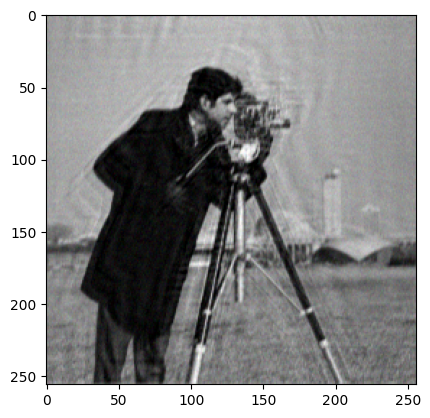

In [10]:
x, psnr, tab = red_denoising("images/photographer.png", niter=100)
plt.imshow(x)

## CRR-NN

In [29]:
x, psnr, ssim = crr_nn_denoising("images/photographer.png", niter=100)

--- loading checkpoint from epoch 10 ---
---------------------
Building a CRR-NN model with 
 - [1, 8, 32] channels 
 splines parameters:
  (LinearSpline(mode=conv, num_activations=32, init=zero, size=21, grid=0.010, monotonic_constraint=True.))
---------------------
---------------------
 PRUNNING 
 Found 23 filters with non-vanishing potential functions
---------------------
 Number of parameters after prunning: 4373


psnr: 23.47 | ssim: 0.7299 | res: 1.38e-04:  83%|████████▎ | 83/100 [00:34<00:10,  1.57it/s]

: 